In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()



In [3]:
import yfinance as yf 


In [4]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-01",freq="D",periods=len(usd)))
usd=usd.dropna()
usd

,USD/TL
2006-01-02,1.3483
2006-01-03,1.3506
2006-01-04,1.3484
2006-01-05,1.3381
2006-01-06,1.3362
...,...
2024-07-24,32.9398
2024-07-25,32.8698
2024-07-26,33.0427
2024-07-29,33.0180


In [5]:
params = {
    'series': "TP.FE.OKTG01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf = formatted_response['items']
enf = pd.DataFrame(enf)


enf = enf.drop(columns=['UNIXTIME','Tarih'])
enf.columns = ['TÜFE']
enf['TÜFE'] = pd.to_numeric(enf['TÜFE'])
enf=enf.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2024-02-29,2073.88
2024-03-31,2139.47
2024-04-30,2207.50
2024-05-31,2281.85


In [6]:
params = {
    'series': "TP.PR.ARZ13",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

money = formatted_response['items']
money = pd.DataFrame(money)


money = money.drop(columns=['UNIXTIME','Tarih'])
money.columns = ['Para Arzi']
money['Para Arzi'] = pd.to_numeric(money['Para Arzi'])
money=money.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(money)))
money=money.pct_change()*100
money=money.dropna()
money

,Para Arzi
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2024-03-31,2.396667
2024-04-30,1.982216
2024-05-31,1.859475
2024-06-30,3.106922


In [7]:
params = {
    'series': "TP.PR.ARZ22",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','YEARWEEK'])
m3.columns = ['Tarih','M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3 = m3.set_index(pd.to_datetime(m3["Tarih"], format="%d-%m-%Y"))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2024-03-31,2.687835
2024-04-30,2.405048
2024-05-31,3.570039


In [8]:
params = {
    'series': "TP.TIG08",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

issizlik = formatted_response['items']
issizlik = pd.DataFrame(issizlik)


issizlik = issizlik.drop(columns=['UNIXTIME','Tarih'])
issizlik.columns = ['İşsizlik']
issizlik['İşsizlik'] = pd.to_numeric(issizlik['İşsizlik'])
issizlik=issizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(issizlik)))
issizlik=issizlik.dropna()
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2024-01-31,9.0
2024-02-29,8.7
2024-03-31,8.6
2024-04-30,8.5


In [9]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2024-03-31,84.665499
2024-04-30,88.999999
2024-05-31,82.991819


In [10]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','YEARWEEK'])
kredi.columns = ['Tarih','Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi = kredi.set_index(pd.to_datetime(kredi["Tarih"], format="%d-%m-%Y"))
del kredi["Tarih"]
kredi=kredi.pct_change(4)*100
kredi=kredi.resample('M').last()
kredi=kredi.dropna()
kredi

,Kredi
Tarih,
2006-02-28,1.559036
2006-03-31,5.768193
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.965727
...,...
2024-03-31,4.108658
2024-04-30,1.832087
2024-05-31,2.996833


In [11]:
params = {
    'series': "TP.APIFON4",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

pfaiz = formatted_response['items']
pfaiz = pd.DataFrame(pfaiz)


pfaiz = pfaiz.drop(columns=['UNIXTIME','Tarih'])
pfaiz.columns = ['Faiz']
pfaiz['Faiz'] = pd.to_numeric(pfaiz['Faiz'])
pfaiz=pfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(pfaiz)))
pfaiz=pfaiz.dropna()
pfaiz

,Faiz
2011-01-31,6.438571
2011-02-28,6.250000
2011-03-31,6.250000
2011-04-30,6.267619
2011-05-31,6.250000
...,...
2024-03-31,47.287619
2024-04-30,51.357222
2024-05-31,50.544545
2024-06-30,50.106471


In [12]:
motorin=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
motorin=motorin.iloc[-1,:]
motorin=pd.DataFrame(motorin[3:])
motorin=motorin.set_index(pd.date_range(start="2005-01-31",periods=len(motorin),freq="M"))
motorin.columns=["Motorin"]
motorin

,Motorin
2005-01-31,1.75
2005-02-28,1.78
2005-03-31,1.87
2005-04-30,1.94
2005-05-31,1.88
...,...
2024-02-29,43.0968
2024-03-31,42.0568
2024-04-30,42.6763
2024-05-31,41.2854


In [13]:
params = {
    'series': "TP.TRY.MT02",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

mfaiz = formatted_response['items']
mfaiz = pd.DataFrame(mfaiz)


mfaiz = mfaiz.drop(columns=['UNIXTIME','Tarih'])
mfaiz.columns = ['Mevduat Faizi']
mfaiz['Mevduat Faizi'] = pd.to_numeric(mfaiz['Mevduat Faizi'])
mfaiz=mfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(mfaiz)))
mfaiz=mfaiz.dropna()
mfaiz

,Mevduat Faizi
2006-01-31,15.913333
2006-02-28,15.760000
2006-03-31,15.330000
2006-04-30,15.175000
2006-05-31,14.925000
...,...
2024-03-31,57.272000
2024-04-30,67.567500
2024-05-31,64.538000
2024-06-30,59.695000


In [14]:
params = {
    'series': "TP.BEK.S01.A.S",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf_belirsizlik = formatted_response['items']
enf_belirsizlik = pd.DataFrame(enf_belirsizlik)


enf_belirsizlik = enf_belirsizlik.drop(columns=['UNIXTIME','Tarih'])
enf_belirsizlik.columns = ['Enflasyon Belirsizliği']
enf_belirsizlik['Enflasyon Belirsizliği'] = pd.to_numeric(enf_belirsizlik['Enflasyon Belirsizliği'])
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf_belirsizlik)))
enf_belirsizlik=enf_belirsizlik.dropna()
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2024-03-31,0.64
2024-04-30,0.55
2024-05-31,0.47
2024-06-30,0.48


In [15]:
params = {
    'series': "TP.FG.B01.95",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ito = formatted_response['items']
ito = pd.DataFrame(ito)


ito = ito.drop(columns=['UNIXTIME','Tarih'])
ito.columns = ['İTO']
ito['İTO'] = pd.to_numeric(ito['İTO'])
ito=ito.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ito)))
ito=ito.pct_change()*100
ito=ito.dropna()
ito

,İTO
2006-02-28,1.005528
2006-03-31,0.137253
2006-04-30,2.088936
2006-05-31,1.595826
2006-06-30,-0.100368
...,...
2024-02-29,4.070637
2024-03-31,3.926249
2024-04-30,4.894259
2024-05-31,3.589407


In [16]:
params = {
    'series': "TP.FE.OKTG04",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tufec = formatted_response['items']
tufec = pd.DataFrame(tufec)


tufec = tufec.drop(columns=['UNIXTIME','Tarih'])
tufec.columns = ['TÜFE C']
tufec['TÜFE C'] = pd.to_numeric(tufec['TÜFE C'])
tufec=tufec.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tufec)))
tufec=tufec.pct_change()*100
tufec=tufec.shift(1)
tufec=tufec.dropna()
tufec

,TÜFE C
2006-03-31,-1.101304
2006-04-30,-0.368460
2006-05-31,1.857331
2006-06-30,2.622237
2006-07-31,1.344445
...,...
2024-02-29,7.576163
2024-03-31,3.571725
2024-04-30,3.524351
2024-05-31,3.562117


In [17]:
params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
2006-02-28,0.256616
2006-03-31,0.247960
2006-04-30,1.938881
2006-05-31,2.770820
2006-06-30,4.021325
...,...
2024-02-29,3.737000
2024-03-31,3.294983
2024-04-30,3.602753
2024-05-31,1.957875


In [18]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['ÜFE']
ihracat['ÜFE'] = pd.to_numeric(ihracat['ÜFE'])
ihracat=ihracat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ihracat)))
ihracat=ihracat.shift(1)
ihracat=ihracat.dropna()
ihracat=ihracat.pct_change()*100
ihracat

,ÜFE
2013-02-28,NaN
2013-03-31,7.272509
2013-04-30,6.926004
2013-05-31,-4.381315
2013-06-30,5.141469
...,...
2024-01-31,-0.013509
2024-02-29,-12.996120
2024-03-31,5.560892
2024-04-30,7.087821


In [19]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['ÜFE']
ithalat['ÜFE'] = pd.to_numeric(ithalat['ÜFE'])
ithalat=ithalat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ithalat)))
ithalat=ithalat.shift(1)
ithalat=ithalat.dropna()
ithalat=ithalat.pct_change()*100
ithalat

,ÜFE
2013-02-28,NaN
2013-03-31,3.993020
2013-04-30,4.802567
2013-05-31,11.093906
2013-06-30,0.635134
...,...
2024-01-31,0.410951
2024-02-29,-9.739818
2024-03-31,6.280869
2024-04-30,7.387077


In [20]:
params = {
    'series': "TP.PKAUO.S01.A.U",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

anket = formatted_response['items']
anket = pd.DataFrame(anket)


anket = anket.drop(columns=['UNIXTIME','Tarih'])
anket.columns = ['ÜFE']
anket['ÜFE'] = pd.to_numeric(anket['ÜFE'])
anket=anket.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(anket)))
anket=anket.dropna()

anket

,ÜFE
2013-01-31,0.85
2013-02-28,0.53
2013-03-31,0.48
2013-04-30,0.65
2013-05-31,0.46
...,...
2024-03-31,3.43
2024-04-30,3.25
2024-05-31,3.04
2024-06-30,2.52


In [21]:
data=pd.DataFrame()
data["USD/TL"]=usd["USD/TL"].resample('M').mean().rolling(3).mean()
data["Motorin"]=motorin["Motorin"]
data["TÜFE"]=enf["TÜFE"]
data["TÜFEt-1"]=data["TÜFE"].shift(1)
data=data.pct_change()*100
data["M3"]=m3["M3"].shift(1)
data["ÜFEt1"]=üfe["ÜFE"].shift(1)
data["ÜFEt2"]=üfe["ÜFE"].shift(2)
data["TÜFECt1"]=tufec["TÜFE C"]
data["TÜFECt2"]=tufec["TÜFE C"].shift(1)
data["İTO"]=ito["İTO"]
data["İhracat"]=ihracat["ÜFE"]
data["İthalat"]=ithalat["ÜFE"]
data["Anket"]=anket["ÜFE"]
data

,USD/TL,Motorin,TÜFE,TÜFEt-1,M3,ÜFEt1,ÜFEt2,TÜFECt1,TÜFECt2,İTO,İhracat,İthalat,Anket
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,0.000000,0.218500,NaN,NaN,NaN,NaN,NaN,NaN,1.005528,NaN,NaN,NaN
2006-03-31,NaN,0.975610,0.274548,0.218500,2.204708,0.256616,NaN,-1.101304,NaN,0.137253,NaN,NaN,NaN
2006-04-30,0.075089,2.898551,1.336769,0.274548,2.711175,0.247960,0.256616,-0.368460,-1.101304,2.088936,NaN,NaN,NaN
2006-05-31,2.353679,4.694836,1.875397,1.336769,1.323922,1.938881,0.247960,1.857331,-0.368460,1.595826,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,3.239458,-2.413172,3.162671,4.529188,2.359600,3.737000,4.136164,3.571725,7.576163,3.926249,5.560892,6.280869,3.43
2024-04-30,2.452282,1.473008,3.179759,3.162671,2.687835,3.294983,3.737000,3.524351,3.571725,4.894259,7.087821,7.387077,3.25
2024-05-31,1.565526,-3.259186,3.368063,3.179759,2.405048,3.602753,3.294983,3.562117,3.524351,3.589407,-14.766322,-2.558099,3.04
2024-06-30,0.553511,0.290660,1.640774,3.368063,3.570039,1.957875,3.602753,3.760332,3.562117,3.420697,NaN,NaN,2.52


In [22]:

data["Kredi"]=kredi["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Faiz"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği','Zam','TÜFEt-1','ParaArzi','Kredi','İhracat','İthalat','Mevduat Faizi','Anket','İşsizlik','Politika Faizi','ÜFEt2','TÜFECt2','ÜFEt1','TÜFECt1','İTO','TÜFE']]
data.iloc[:12,4]=380.46
data.iloc[12:18,4]=403.03
data.iloc[18:24,4]=419.15
data.iloc[24:30,4]=481.55
data.iloc[30:36,4]=503.26
data.iloc[36:42,4]=527.13
data.iloc[42:48,4]=546.48
data.iloc[48:54,4]=576.57
data.iloc[54:60,4]=599.12
data.iloc[60:66,4]=629.96
data.iloc[66:72,4]=658.95
data.iloc[72:78,4]=701.13
data.iloc[78:84,4]=739.79
data.iloc[84:90,4]=773.01
data.iloc[90:96,4]=803.68
data.iloc[96:102,4]=846.00
data.iloc[102:108,4]=891.03
data.iloc[108:114,4]=949.07
data.iloc[114:120,4]=1000.54
data.iloc[120:132,4]=1300.99
data.iloc[132:144,4]=1404.06
data.iloc[144:156,4]=1603.12
data.iloc[156:168,4]=2020.9
data.iloc[168:180,4]=2324.71
data.iloc[180:192,4]=2825.90
data.iloc[192:198,4]=4253.4
data.iloc[198:204,4]=5500.35
data.iloc[204:210,4]=8506.8
data.iloc[210:216,4]=11402.33
data.iloc[216:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)

data["İşsizlik"].iloc[-2:]=8.4


data=data.loc["2014-01-31":]
data["TÜFE"].loc["2023-05-31"]+=2.88
data["ÜFEt1"].iloc[-1]=1.38
data["ÜFEt2"].iloc[-2:]=[3.6027,1.9578]
data["TÜFECt1"].iloc[-1]=1.73
data["Motorin"].iloc[-1]=8.88
data["TÜFECt2"].iloc[-1]=3.76
data["İhracat"].iloc[-2:]=[24.93,-22.87]
data["İthalat"].iloc[-2:]=[4.87,-18.27]
data["Kredi"].iloc[-1]=2.02
data=data.dropna()
data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,İhracat,İthalat,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE
2014-01-31,3.732429,2.881984,3.413428,0.37,5.265777,0.460607,3.375162,2.886648,-7.844611,7.652883,9.022000,1.06,9.2,7.503636,0.618013,0.625859,1.106494,-0.111246,0.333618,1.978080
2014-02-28,3.033477,1.685899,1.958423,0.31,0.000000,1.978080,1.804994,2.214819,-6.175956,-14.641565,10.627500,0.69,9.5,10.070500,1.106494,-0.111246,3.319203,0.308798,1.009554,0.428192
2014-03-31,2.465778,-2.278097,0.229599,0.16,0.000000,0.428192,0.451349,1.160171,4.991889,-6.505852,11.312500,0.65,9.5,10.200952,3.319203,0.308798,1.383675,0.701489,0.989257,1.125608
2014-04-30,-1.344724,-6.214384,0.730196,0.23,0.000000,1.125608,0.796760,0.126575,12.575902,13.043316,11.020000,0.76,9.7,10.046190,1.383675,0.701489,0.736212,1.197755,2.649799,1.344970
2014-05-31,-1.859714,-0.561578,-0.093468,0.26,0.000000,1.344970,-0.362357,0.464970,-7.919312,0.662228,10.494000,0.63,9.7,9.891000,0.736212,1.197755,0.085477,2.119546,0.211698,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,3.239458,-2.413172,2.359600,0.64,0.000000,4.529188,1.467195,3.009414,5.560892,6.280869,57.272000,3.43,8.6,47.287619,4.136164,7.576163,3.737000,3.571725,3.926249,3.162671
2024-04-30,2.452282,1.473008,2.687835,0.55,0.000000,3.162671,2.396667,3.023668,7.087821,7.387077,67.567500,3.25,8.5,51.357222,3.737000,3.571725,3.294983,3.524351,4.894259,3.179759
2024-05-31,1.565526,-3.259186,2.405048,0.47,0.000000,3.179759,1.982216,2.979193,-14.766322,-2.558099,64.538000,3.04,8.4,50.544545,3.294983,3.524351,3.602753,3.562117,3.589407,3.368063
2024-06-30,0.553511,0.290660,3.570039,0.48,0.000000,3.368063,1.859475,2.380063,24.930000,4.870000,59.695000,2.52,8.4,50.106471,3.602700,3.562117,1.957875,3.760332,3.420697,1.640774


## Cari Ay Enflasyon Tahmini

In [23]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Zam,ParaArzi,Kredi,Anket,İhracat,İşsizlik,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,0.441610,0.110006,0.258093,0.387784,0.650996,-0.364495,-0.674142,-1.200615,-0.546226,-0.542175,-0.383708,-0.892610,0.040870
1,0.231585,-0.051919,-0.291927,-0.183738,0.189261,-0.640480,-0.547343,-1.003785,-0.381357,-0.887498,0.363745,-0.695596,-0.649830
2,0.060999,-0.588560,-0.291927,-0.676448,-0.535579,-0.670317,0.301283,-1.003785,0.365461,-0.690713,-0.290076,-0.511413,-0.339030
3,-1.084004,-1.121450,-0.291927,-0.550723,-1.245950,-0.588267,0.877580,-0.872564,-0.287805,-0.506744,-0.508789,-0.278649,-0.241272
4,-1.238752,-0.356180,-0.291927,-0.972627,-1.013378,-0.685235,-0.679818,-0.872564,-0.506333,-0.274250,-0.728608,0.153700,-0.664522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.293479,-0.606846,-0.291927,-0.306693,0.735371,1.403301,0.344521,-1.594277,0.641197,2.713940,0.504877,0.834816,0.568776
123,0.056944,-0.080740,-0.291927,0.031624,0.745168,1.269038,0.460549,-1.659887,0.506474,0.837920,0.355563,0.812596,0.576392
124,-0.209514,-0.721379,-0.291927,-0.119231,0.714600,1.112398,-1.200111,-1.725497,0.357287,0.815726,0.459528,0.830310,0.660308
125,-0.513611,-0.240805,-0.291927,-0.163908,0.302830,0.724527,1.816348,-1.725497,0.461146,0.833418,-0.096112,0.923279,-0.109449


In [24]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:-1,:]
y_train,y_test=y[:-7],y[-7:-1]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)


In [25]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
def weighted_mse(y_true, y_pred):
    n = len(y_true)
    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar
    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)
    mse = np.sum(weights * (y_true - y_pred) ** 2) / n
    return mse
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 256)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','linear'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) 

    

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns=["TÜFE"]
    tahminler["Tahmin"]=scaler2.inverse_transform(y_pred)
    tahminler=tahminler.set_index(data.index[-7:-1])
    tahminler.loc["2024-01-31"]=6.70
    max=abs(tahminler["TÜFE"]-tahminler["Tahmin"]).max()
    mse=mean_squared_error(tahminler["TÜFE"],tahminler["Tahmin"])


    return mse # Return validation accuracy as the objective

In [ ]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=43,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.2788740756825726)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.009377039965970141)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN1"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-7:])

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.4827 - mean_squared_error: 1.2560 - val_loss: 2.2744 - val_mean_squared_error: 0.2009
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9825 - mean_squared_error: 0.3013 - val_loss: 0.8741 - val_mean_squared_error: 0.0528
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8608 - mean_squared_error: 0.1836 - val_loss: 0.4377 - val_mean_squared_error: 0.0726
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4775 - mean_squared_error: 0.1680 - val_loss: 0.2354 - val_mean_squared_error: 0.0578
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3184 - mean_squared_error: 0.1700 - val_loss: 0.1714 - val_mean_squared_error: 0.0579
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2550 - mean_squared_error: 0.1536 - val_loss: 0.1486 - val_mean_squared_error: 0.0698
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2318 - mean_squared_error: 0.1598 - val_loss: 0.1

In [28]:
mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN1"].iloc[:-1])

0.25990762555644287

In [29]:
tahminler

,TÜFE,NN1
2024-01-31,6.703310,6.801314
2024-02-29,4.529188,4.197004
2024-03-31,3.162671,2.792313
2024-04-30,3.179759,3.164493
2024-05-31,3.368063,2.451557
2024-06-30,1.640774,2.320563
2024-07-31,0.000000,3.024281


In [30]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-13,:],X.iloc[-13:,:]
y_train,y_test=y[:-13],y[-13:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=32,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.17424279013407418)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.014212504541816193)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler2=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler2.columns=["TÜFE"]
tahminler2["NN2"]=scaler2.inverse_transform(y_pred)
tahminler2=tahminler2.set_index(data.index[-13:])


Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.1545 - mean_squared_error: 0.7650 - val_loss: 1.1254 - val_mean_squared_error: 0.1029
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1458 - mean_squared_error: 0.3309 - val_loss: 0.4219 - val_mean_squared_error: 0.0385
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6061 - mean_squared_error: 0.2884 - val_loss: 0.2393 - val_mean_squared_error: 0.0679
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4193 - mean_squared_error: 0.2732 - val_loss: 0.1452 - val_mean_squared_error: 0.0611
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3761 - mean_squared_error: 0.2975 - val_loss: 0.1461 - val_mean_squared_error: 0.0892
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [31]:
mean_squared_error(tahminler2["TÜFE"].iloc[:-1],tahminler2["NN2"].iloc[:-1])

0.8197112735045323

In [152]:
tahminler2

,TÜFE,NN2
2023-07-31,9.488824,8.618100
2023-08-31,9.086793,6.721649
2023-09-30,4.753114,4.656461
2023-10-31,3.433981,3.166579
2023-11-30,3.281097,3.034851
2023-12-31,2.927207,2.579527
2024-01-31,6.703310,6.721980
2024-02-29,4.529188,3.562062
2024-03-31,3.162671,2.648104
2024-04-30,3.179759,2.935801


In [32]:
features=['USD/TL', 'Motorin', 'TÜFEt-1', 'ParaArzi', 'Kredi', 'Anket', 
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-25,:],X.iloc[-13:,:]
y_train,y_test=y[:-25],y[-13:]
X_val=X.iloc[-25:-13,:]
y_val=y[-25:-13]
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=29,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.42170876820347847)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0017583324241828712)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=25,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler3=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler3.columns=["TÜFE"]
tahminler3["NN3"]=scaler2.inverse_transform(y_pred)
tahminler3=tahminler3.set_index(data.index[-13:])


Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 7.7601 - mean_squared_error: 1.2514 - val_loss: 7.7106 - val_mean_squared_error: 1.4569
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.1292 - mean_squared_error: 0.9342 - val_loss: 7.3198 - val_mean_squared_error: 1.3611
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6480 - mean_squared_error: 0.7489 - val_loss: 6.9404 - val_mean_squared_error: 1.2785
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.2290 - mean_squared_error: 0.6271 - val_loss: 6.5550 - val_mean_squared_error: 1.1900
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.8416 - mean_squared_error: 0.5363 - val_loss: 6.1659 - val_mean_squared_error: 1.0943
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.4772 - mean_squared_error: 0.4642 - val_loss: 5.7850 - val_mean_squared_error: 0.9998
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.1393 - mean_squared_error: 0.4107 - val_loss: 5.4244 - va

In [33]:
tahminler3

,TÜFE,NN3
2023-07-31,9.488824,8.034248
2023-08-31,9.086793,7.882153
2023-09-30,4.753114,5.389158
2023-10-31,3.433981,3.561996
2023-11-30,3.281097,3.331900
2023-12-31,2.927207,2.647594
2024-01-31,6.703310,4.951542
2024-02-29,4.529188,3.899013
2024-03-31,3.162671,2.703332
2024-04-30,3.179759,3.171610


In [34]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-14,:],X.iloc[-14:,:]
y_train,y_test=y[:-14],y[-14:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=26,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.1640998114336349)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.021385011088592594)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=5000, batch_size=33,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler4=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler4.columns=["TÜFE"]
tahminler4["NN4"]=scaler2.inverse_transform(y_pred)
tahminler4=tahminler4.set_index(data.index[-14:])

Epoch 1/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 3.1248 - mean_squared_error: 0.7164 - val_loss: 2.5253 - val_mean_squared_error: 0.6557
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2899 - mean_squared_error: 0.5347 - val_loss: 1.4141 - val_mean_squared_error: 0.1059
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4873 - mean_squared_error: 0.2498 - val_loss: 1.1125 - val_mean_squared_error: 0.1672
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1540 - mean_squared_error: 0.2615 - val_loss: 0.8125 - val_mean_squared_error: 0.1444
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8359 - mean_squared_error: 0.2088 - val_loss: 0.5422 - val_mean_squared_error: 0.0760
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5874 - mean_squared_error: 0.1469 - val_loss: 0.4838 - val_mean_squared_error: 0.1457
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5153 - mean_squared_error: 0.1947 - val_loss: 0.3538 - va

In [35]:
tahminler4

,TÜFE,NN4
2023-06-30,3.920498,2.791590
2023-07-31,9.488824,9.398454
2023-08-31,9.086793,8.066264
2023-09-30,4.753114,5.882902
2023-10-31,3.433981,4.347326
2023-11-30,3.281097,4.038237
2023-12-31,2.927207,3.575499
2024-01-31,6.703310,6.841128
2024-02-29,4.529188,4.530875
2024-03-31,3.162671,3.627618


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


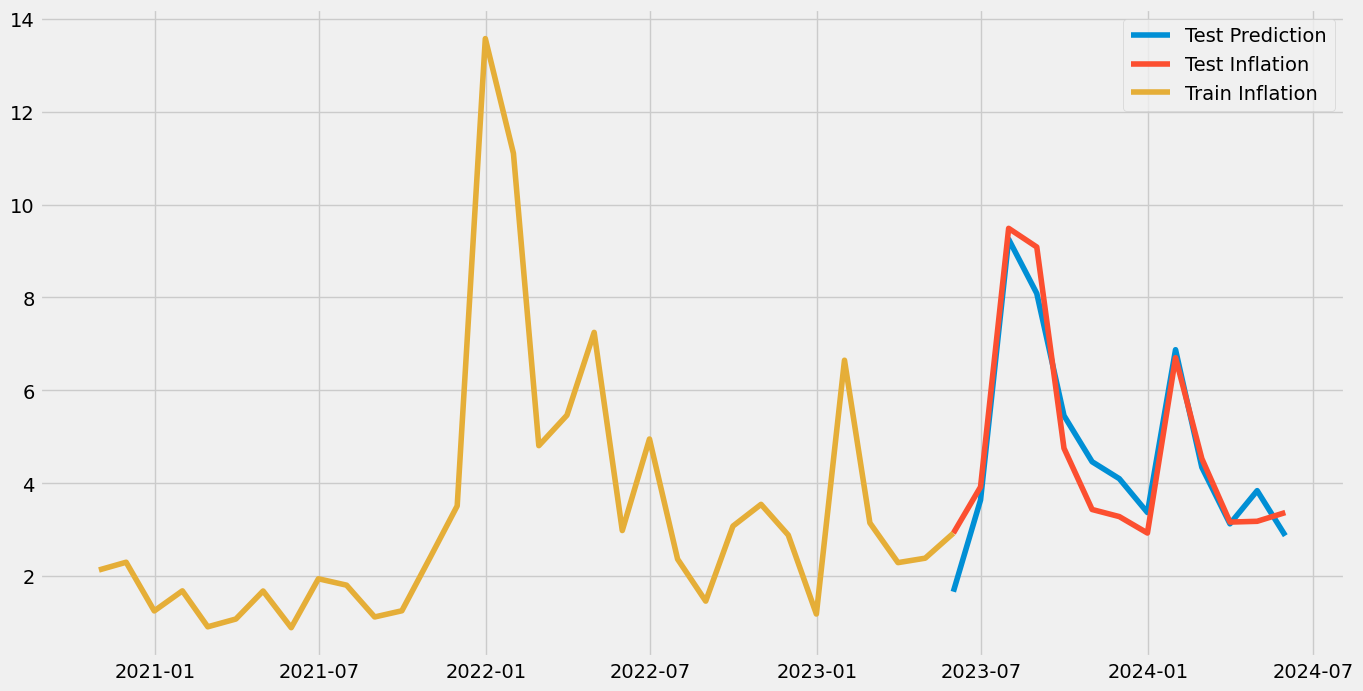

In [145]:
plt.figure(figsize=(15,8))
plt.plot(pd.DataFrame(scaler2.inverse_transform(np.array(model.predict(scaled_data.iloc[-14:-1,:-1])).reshape(-1,1))).set_index(data1.index[-14:-1]),label="Test Prediction")
plt.plot(data["TÜFE"].iloc[-14:-1],label="Test Inflation")
plt.plot(data["TÜFE"].iloc[-45:-13],label="Train Inflation")

plt.legend()

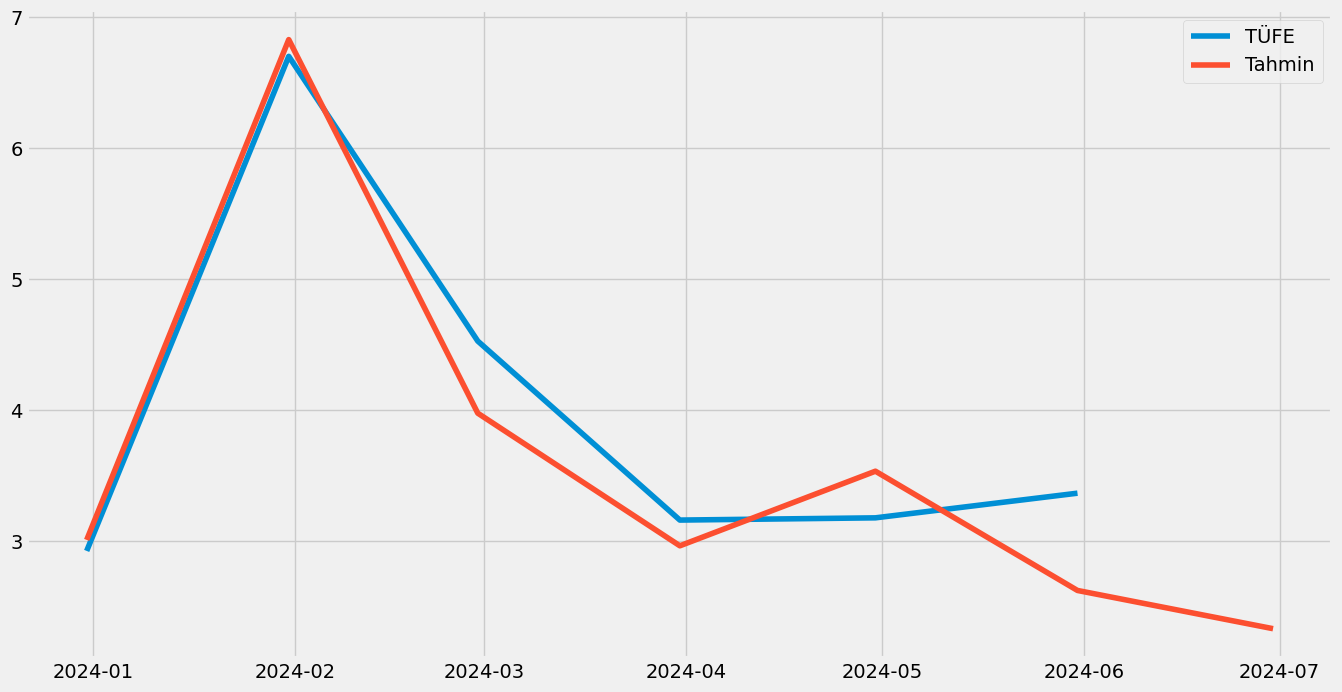

In [146]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"].iloc[:-1],label="TÜFE")
plt.plot(tahminler["NN1"],label="Tahmin")
plt.legend()

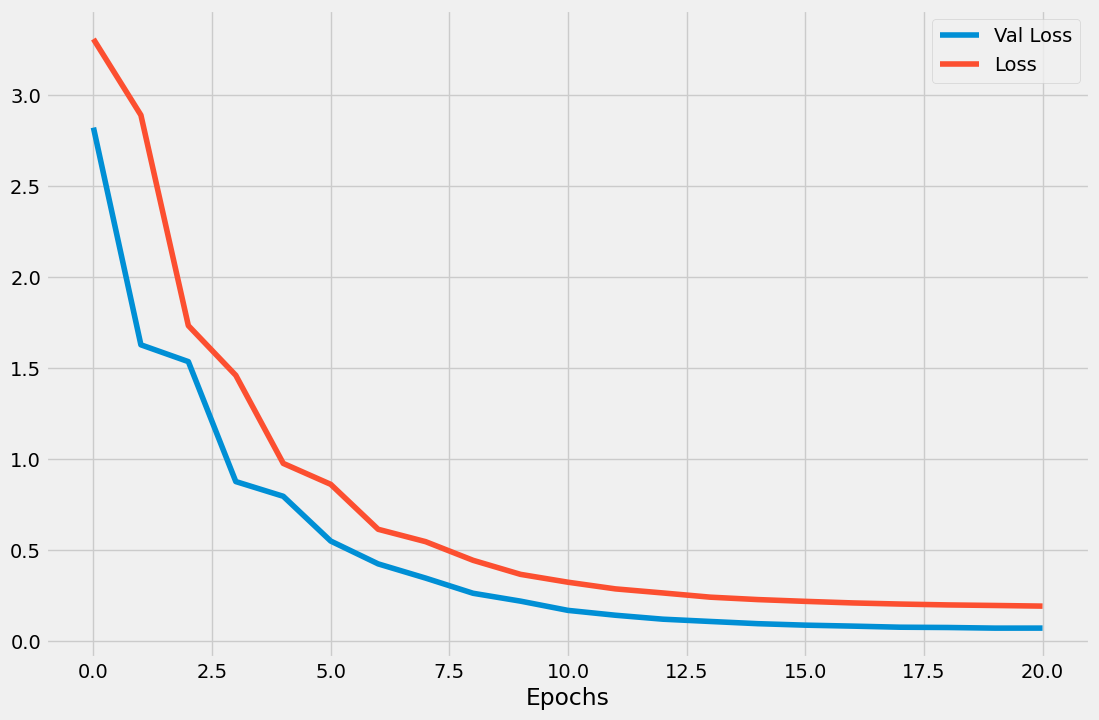

In [147]:
plt.figure(figsize=(12,8))
plt.plot(history.history["val_loss"],label="Val Loss")
plt.plot(history.history["loss"],label="Loss")
plt.xlabel("Epochs")
plt.legend()

In [36]:
kısatahminler=pd.concat([tahminler.iloc[-7:],tahminler2.iloc[-7:,1],tahminler3.iloc[-7:,1],tahminler4.iloc[-7:,1]],axis=1)
kısatahminler["Ortalama"]=kısatahminler.iloc[:,1:].mean(axis=1)
kısatahminler

,TÜFE,NN1,NN2,NN3,NN4,Ortalama
2024-01-31,6.703310,6.801314,6.721987,4.951542,6.841128,6.328993
2024-02-29,4.529188,4.197004,3.562061,3.899013,4.530875,4.047238
2024-03-31,3.162671,2.792313,2.648112,2.703332,3.627618,2.942844
2024-04-30,3.179759,3.164493,2.935802,3.171610,3.886328,3.289558
2024-05-31,3.368063,2.451557,2.191079,2.669761,3.499373,2.702943
2024-06-30,1.640774,2.320563,2.400247,2.208792,2.705209,2.408703
2024-07-31,0.000000,3.024281,2.528698,2.809394,3.721450,3.020956


## Orta Vadeli Tahminler

In [37]:
model=auto_arima(pfaiz["Faiz"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Faiz"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
row=pd.DataFrame({"Faiz":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2024-04-30",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)

faiztahmin.iloc[4:,0]=[50,50,50,50,50,50,50,50,50,50,50,45,40,35,35,35,35,30,30,30,30,30,25,25,25]
faiztahmin

,Faiz
2024-04-30,51.357222
2024-05-31,50.544545
2024-06-30,50.106471
2024-07-31,50.000000
2024-08-31,50.000000
2024-09-30,50.000000
2024-10-31,50.000000
2024-11-30,50.000000
2024-12-31,50.000000
2025-01-31,50.000000


In [38]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [39]:
exog=pd.DataFrame()
exog["X"]=usd["USD/TL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.897922
2007-08-31,94.606608
2007-10-31,98.111410
2007-11-30,110.422510
2007-12-31,107.237150
...,...
2023-11-30,2372.262380
2024-01-31,2403.605577
2024-02-29,2542.824291
2024-04-30,2888.414877


In [40]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [41]:
faiztahmin.columns=["Faiz"]


In [42]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Faiz"].iloc[95:-13]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Faiz"].iloc[-14:-3],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [43]:
exog=pfaiz["Faiz"].iloc[36:-2]
exog=np.array(exog).reshape(-1,1)

In [44]:
exogtest=faiztahmin.iloc[2:]
exogtest=np.array(exogtest).reshape(-1,1)

In [45]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(27,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-06-30,8.390175
2024-07-31,8.382133
2024-08-31,8.356908
2024-09-30,8.353280
2024-10-31,8.351119
2024-11-30,8.345414
2024-12-31,8.344594
2025-01-31,8.344105
2025-02-28,8.342815
2025-03-31,8.342629


In [46]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [47]:
import optuna


In [34]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.01, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.50,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=usd.index
    sn["y"]=usd.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=500,freq="D")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(usd.values,predictions["yhat"][:-500])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.01, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.50,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=usd.index\n    sn["y"]=usd.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],sea

In [35]:
"""study.best_params"""

'study.best_params'

In [48]:
sn=pd.DataFrame()
sn["ds"]=usd.index
sn["y"]=usd.values
prophet=Prophet(growth="linear",changepoint_prior_scale=8.828175414699565,changepoint_range=0.950080828826867,seasonality_prior_scale=7.816953755754968,n_changepoints=100,interval_width=0.70,yearly_seasonality=False,weekly_seasonality="auto")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=500,freq="D")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

22:57:53 - cmdstanpy - INFO - Chain [1] start processing
22:58:05 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
(predictions["yhat"].resample('M').mean().tail(18).pct_change()*100).dropna()

ds
2024-08-31    1.790069
2024-09-30    1.682186
2024-10-31    1.649177
2024-11-30    1.631295
2024-12-31    1.599443
2025-01-31    1.597841
2025-02-28    1.502620
2025-03-31    1.481133
2025-04-30    1.500088
2025-05-31    1.485349
2025-06-30    1.462142
2025-07-31    1.436560
2025-08-31    1.449357
2025-09-30    1.394384
2025-10-31    1.379618
2025-11-30    1.368418
2025-12-31    0.910049
Freq: ME, Name: yhat, dtype: float64

In [50]:
usdtahmin=(predictions["yhat"].resample('M').mean().tail(18).pct_change()*100).dropna()
usdtahmin

ds
2024-08-31    1.790069
2024-09-30    1.682186
2024-10-31    1.649177
2024-11-30    1.631295
2024-12-31    1.599443
2025-01-31    1.597841
2025-02-28    1.502620
2025-03-31    1.481133
2025-04-30    1.500088
2025-05-31    1.485349
2025-06-30    1.462142
2025-07-31    1.436560
2025-08-31    1.449357
2025-09-30    1.394384
2025-10-31    1.379618
2025-11-30    1.368418
2025-12-31    0.910049
Freq: ME, Name: yhat, dtype: float64

In [51]:
usd_aylık=usd.resample('M').mean().dropna()

In [52]:
usdtahmin1 = []
result = usd_aylık.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([usd_aylık["USD/TL"].loc["2024-03-31":],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2024-03-31", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.247882
2024-06-30,32.521235
2024-07-31,32.885190
2024-08-31,33.473858
2024-09-30,34.036951
2024-10-31,34.598280
2024-11-30,35.162680
2024-12-31,35.725087


In [41]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [42]:
"""study.best_params"""

'study.best_params'

In [53]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=9.333547662504625,changepoint_range=0.9362159367416,seasonality_prior_scale=2.378940289163559,n_changepoints=98)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

22:58:49 - cmdstanpy - INFO - Chain [1] start processing
22:58:49 - cmdstanpy - INFO - Chain [1] done processing


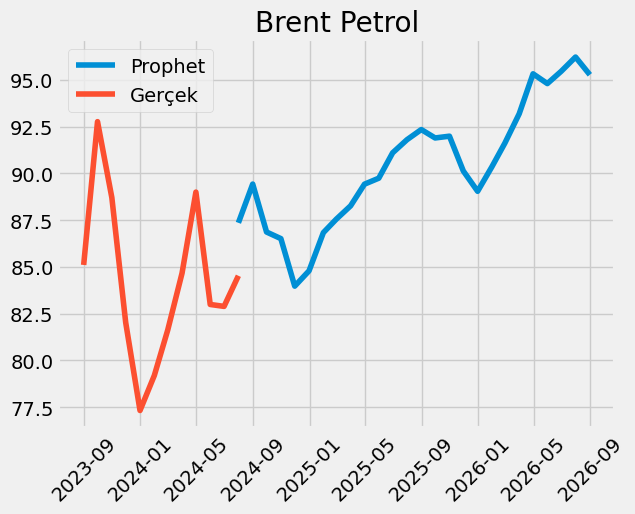

In [40]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [54]:
brenttahmin=predictions["yhat"][-29:]
brenttahmin

ds
2024-04-30    83.467227
2024-05-31    84.474384
2024-06-30    86.330398
2024-07-31    86.945943
2024-08-31    89.315972
2024-09-30    86.869367
2024-10-31    86.736936
2024-11-30    84.293336
2024-12-31    85.070128
2025-01-31    86.927435
2025-02-28    87.383100
2025-03-31    88.014709
2025-04-30    89.094292
2025-05-31    89.271036
2025-06-30    90.535175
2025-07-31    91.316722
2025-08-31    92.123226
2025-09-30    91.800911
2025-10-31    92.052454
2025-11-30    90.213345
2025-12-31    89.045232
2026-01-31    90.251341
2026-02-28    91.521021
2026-03-31    92.824769
2026-04-30    94.721298
2026-05-31    94.042852
2026-06-30    94.719506
2026-07-31    95.667198
2026-08-31    94.944017
Name: yhat, dtype: float64

In [46]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = o

22:58:57 - cmdstanpy - INFO - Chain [1] start processing
22:58:57 - cmdstanpy - INFO - Chain [1] done processing


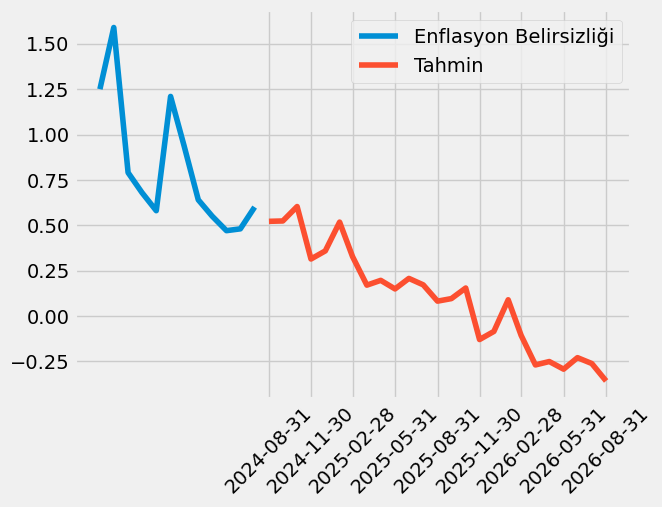

In [56]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=1.7,changepoint_range=0.91,seasonality_prior_scale=0.1053403857042852,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()

In [57]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-07-31,0.600000
2024-08-31,0.521407
2024-09-30,0.523522
2024-10-31,0.603051
2024-11-30,0.313802
2024-12-31,0.358463
2025-01-31,0.517260
2025-02-28,0.326938
2025-03-31,0.169687


In [49]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [50]:
#study.best_params

In [58]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-05-31    1.206650
2024-06-30    2.197132
2024-07-31    0.713011
2024-08-31    2.725865
2024-09-30   -2.739270
2024-10-31   -0.152448
2024-11-30   -2.817255
2024-12-31    0.921534
2025-01-31    2.183266
2025-02-28    0.524191
2025-03-31    0.722805
2025-04-30    1.226593
2025-05-31    0.198379
2025-06-30    1.416068
2025-07-31    0.863252
2025-08-31    0.883195
2025-09-30   -0.349873
2025-10-31    0.274009
2025-11-30   -1.997892
2025-12-31   -1.294834
2026-01-31    1.354490
2026-02-28    1.406827
2026-03-31    1.424533
2026-04-30    2.043128
2026-05-31   -0.716255
2026-06-30    0.719517
2026-07-31    1.000525
2026-08-31   -0.755934
Name: yhat, dtype: float64

In [59]:
(usdtahmin1[:-5].pct_change(periods=1)*100).dropna()

,USD/TL
2024-04-30,1.071456
2024-05-31,-0.252354
2024-06-30,0.847663
2024-07-31,1.119131
2024-08-31,1.790069
2024-09-30,1.682186
2024-10-31,1.649177
2024-11-30,1.631295
2024-12-31,1.599443
2025-01-31,1.597841


In [53]:
(brenttahmin1[:-7]).dropna()

ds
2024-05-31    1.003012
2024-06-30    2.348736
2024-07-31    1.178192
2024-08-31    2.824667
2024-09-30   -2.624859
2024-10-31    0.313325
2024-11-30   -2.491957
2024-12-31    0.860392
2025-01-31    1.536794
2025-02-28    0.774586
2025-03-31    0.971680
2025-04-30    1.369275
2025-05-31    0.258661
2025-06-30    1.592406
2025-07-31    1.204928
2025-08-31    1.090437
2025-09-30   -0.221929
2025-10-31    0.492880
2025-11-30   -1.804315
2025-12-31   -1.264276
2026-01-31    1.095298
Name: yhat, dtype: float64

In [60]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[:].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1[:-7]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-04-28",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2024-04-30,0.290660
2024-05-31,1.939233
2024-06-30,1.566718
2024-07-31,3.875502
2024-08-31,-0.998236
2024-09-30,1.527173
2024-10-31,-1.214540
2024-11-30,2.567862
2024-12-31,3.817629
2025-01-31,2.130408


In [55]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [61]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=0.904897796889,changepoint_range=0.9529543315216538,growth='linear',seasonality_prior_scale=3.03031163229546,n_changepoints=15)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

22:59:07 - cmdstanpy - INFO - Chain [1] start processing
22:59:07 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-08-31    1.815775
2024-09-30    3.214034
2024-10-31    3.060561
2024-11-30    2.708167
2024-12-31    2.724440
2025-01-31    1.252807
2025-02-28    1.601338
2025-03-31    3.280690
2025-04-30    2.800332
2025-05-31    2.373849
2025-06-30    2.762143
2025-07-31    1.885679
2025-08-31    1.950098
2025-09-30    2.096894
2025-10-31    1.805333
2025-11-30    1.752260
2025-12-31    2.423969
2026-01-31    0.532652
2026-02-28    1.116621
2026-03-31    2.499418
2026-04-30    1.443816
2026-05-31    1.655291
2026-06-30    2.273358
2026-07-31    0.955593
2026-08-31    2.078546
Name: yhat, dtype: float64

In [63]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-08-30", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-6:,0]},index=pd.date_range(start="2024-02-28",periods=6,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
np.cumprod(1+(paraarzitahmin1.loc["2024-01-31":"2024-12-31"])/100)

,Para Arzi
2024-02-29,1.014672
2024-03-31,1.038990
2024-04-30,1.059585
2024-05-31,1.079288
2024-06-30,1.112821
2024-07-31,1.135684
2024-08-31,1.156305
2024-09-30,1.193469
2024-10-31,1.229996
2024-11-30,1.263306


In [59]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [60]:
#study.best_params

In [61]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [62]:
"""study.best_params"""

'study.best_params'

In [64]:
sn=pd.DataFrame()
sn["ds"]=kredi["Kredi"].index
sn["y"]=kredi["Kredi"].values
prophet=Prophet(changepoint_prior_scale=0.01099759561372614,changepoint_range=0.0589785485153,growth="linear",seasonality_prior_scale=0.04157847860739,n_changepoints=10,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

22:59:11 - cmdstanpy - INFO - Chain [1] start processing
22:59:12 - cmdstanpy - INFO - Chain [1] done processing


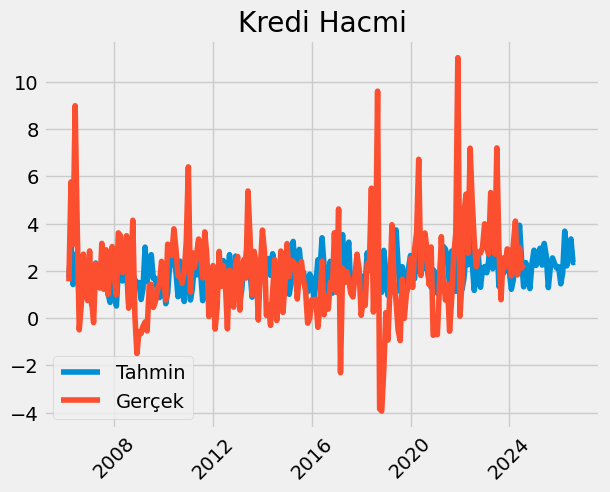

In [64]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(kredi["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [65]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-08-31    2.288350
2024-09-30    1.776937
2024-10-31    1.200400
2024-11-30    2.233995
2024-12-31    2.806806
2025-01-31    2.172315
2025-02-28    2.609158
2025-03-31    2.902175
2025-04-30    2.167733
2025-05-31    3.095529
2025-06-30    2.581646
2025-07-31    1.216825
2025-08-31    2.131384
2025-09-30    2.477770
2025-10-31    2.242467
2025-11-30    2.071324
2025-12-31    2.111219
2026-01-31    1.393058
2026-02-28    1.843709
2026-03-31    3.605318
2026-04-30    2.133195
2026-05-31    2.930997
2026-06-30    3.275778
2026-07-31    2.255035
2026-08-31    2.292120
Name: yhat, dtype: float64

In [66]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-08-30", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":kredi.iloc[-4:,0]},index=pd.date_range(start="2024-04-30",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2024-04-30,1.832087
2024-05-31,2.996833
2024-06-30,2.311270
2024-07-31,2.124771
2024-08-31,2.288350
2024-09-30,1.776937
2024-10-31,1.200400
2024-11-30,2.233995
2024-12-31,2.806806
2025-01-31,2.172315


In [67]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3"].index
    sn["y"]=m3["M3"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3"].index\n    sn["y"]=m3["M3"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["

In [67]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=2.5,changepoint_range=0.9,growth='linear',seasonality_prior_scale=4.7636997959024185,n_changepoints=10)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=18,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

22:59:16 - cmdstanpy - INFO - Chain [1] start processing
22:59:16 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
m3tahmin=(predictions["yhat"].tail(18))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-08-30", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2024-04-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2024-04-30,2.405048
2024-05-31,3.570039
2024-06-30,2.937146
2024-07-31,2.491858
2024-08-31,1.824709
2024-09-30,3.024781
2024-10-31,3.193490
2024-11-30,2.765825
2024-12-31,1.996019
2025-01-31,0.983111


In [70]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [71]:
#study.best_params

In [72]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [69]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean()],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1.shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["Politika Faizi"]=faiztahmin["Faiz"]




tahmindf=tahmindf[['USD/TL', 'Motorin', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3', 'Kredi','İşsizlik','Politika Faizi']]

tahmindf.columns=["USD/TL","Motorin","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Kredi','İşsizlik','Politika Faizi']



tahmindf=tahmindf.loc["2024-07-30":]
tahmindf["Motorin"].iloc[0]=8.88
tahmindf["Kredi"].iloc[0]=2.02
tahmindf

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,İşsizlik,Politika Faizi
2024-07-31,0.572329,8.880000,0.0,0.600000,3.106922,2.937146,2.020000,8.382133,50.0
2024-08-31,1.255425,-0.998236,0.0,0.521407,2.054508,2.491858,2.241463,8.356908,50.0
2024-09-30,1.532879,1.527173,0.0,0.523522,1.815775,1.824709,2.063353,8.353280,50.0
2024-10-31,1.706332,-1.214540,0.0,0.603051,3.214034,3.024781,1.755229,8.351119,50.0
2024-11-30,1.653939,2.567862,0.0,0.313802,3.060561,3.193490,1.737111,8.345414,50.0
2024-12-31,1.626368,3.817629,0.0,0.358463,2.708167,2.765825,2.080400,8.344594,50.0
2025-01-31,1.609348,2.130408,30.0,0.517260,2.724440,1.996019,2.404372,8.344105,50.0
2025-02-28,1.566122,2.236286,0.0,0.326938,1.252807,0.983111,2.529426,8.342815,50.0
2025-03-31,1.526597,2.725894,0.0,0.169687,1.601338,1.511227,2.561216,8.342629,50.0
2025-04-30,1.494601,1.701443,0.0,0.196061,3.280690,2.927854,2.559689,8.342519,50.0


In [70]:
data["TÜFE Lag"]=(enf.pct_change()*100).shift(1).dropna()["TÜFE"]
tahmindf["TÜFE Lag"]=0
tahmindf["TÜFE Lag"].iloc[0]=data["TÜFE"].iloc[-1]

In [71]:
data.loc["2023-06-30","TÜFE Lag"]=data.loc["2023-05-31","TÜFE"]

In [72]:
data=data.dropna()

In [73]:
data1=data[['USD/TL', 'Motorin', 'M3', 'Enflasyon Belirsizliği', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2',
       'ÜFEt1', 'TÜFECt1','Zam', 'TÜFE']]

In [ ]:
import pandas as pd
from prophet import Prophet
import optuna
from sklearn.metrics import mean_squared_error
import cmdstanpy
import warnings
warnings.filterwarnings("ignore")


data1 = data.rename(columns={'TÜFE': 'y'})
data1["ds"]=pd.to_datetime(data.index)
data1=data1.reset_index().drop("index",axis=1)
data1["Motorin"].iloc[-1]=-1.61




regressors = ['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İşsizlik', 'Zam','ÜFEt1']

# Prepare the data for Prophet
prophet_data = data1[['ds', 'y'] + regressors]

# Split the data into training and test sets
train_size = int(len(prophet_data) * 0.9)
train_data = prophet_data[:train_size]
test_data = prophet_data[train_size:]



def objective(trial):
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 0.99)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.001, 10.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 0.001, 10.0)
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    n_changepoints = trial.suggest_int('n_changepoints', 1, 100)
    yearly_seasonality = trial.suggest_categorical('yearly_seasonality', [True, False, "auto"])
    weekly_seasonality = trial.suggest_categorical('weekly_seasonality', [True, False, "auto"])
    daily_seasonality = trial.suggest_categorical('daily_seasonality', [True, False, "auto"])

    # Initialize the Prophet model
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
        seasonality_mode=seasonality_mode,
        n_changepoints=n_changepoints,
        yearly_seasonality=yearly_seasonality,
        weekly_seasonality=weekly_seasonality,
        daily_seasonality=daily_seasonality
    )

    
    # Add selected regressors to the model
    for regressor in regressors:
        model.add_regressor(regressor)


    
    # Fit the model
    model.fit(train_data)
    
    # Make a DataFrame to hold future dates and include the regressors
    future = test_data[['ds'] + list(regressors)].copy()
    
    # Make predictions
    forecast = model.predict(future)
    
    # Merge actual and predicted values
    results = test_data[['ds', 'y']].copy()
    results = results.merge(forecast[['ds', 'yhat']], on='ds')
    
    # Calculate MSE
    mse = mean_squared_error(results['y'], results['yhat'])
    
    return mse

# Create a study object and optimize the objective function
warnings.filterwarnings("ignore")
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)  # Adjust n_trials as needed

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)

# Train the final model with the best hyperparameters
best_params = study.best_params


model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    n_changepoints=best_params['n_changepoints'],
    yearly_seasonality=best_params['yearly_seasonality'],
    weekly_seasonality=best_params['weekly_seasonality'],
    daily_seasonality=best_params['daily_seasonality'],
    interval_width=0.7
)

for regressor in regressors:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(regressors)].copy()
forecast = model.predict(future)

# Merge actual and predicted values
results = test_data[['ds', 'y']].copy()
results = results.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

# Calculate and print performance metrics
mse = mean_squared_error(results['y'], results['yhat'])
print(f'Mean Squared Error: {mse:.4f}')



In [74]:
data1["ds"]=pd.to_datetime(data1.index)
data1=data1.reset_index()

In [75]:
del data1["index"]

In [ ]:
üfe=pd.DataFrame()
üfe["ds"]=pd.to_datetime(data1["ds"])
üfe["y"]=data1["ÜFEt1"].values
üfe["USD/TL"]=data1["USD/TL"].values
train_size = int(len(üfe) * 0.9)
train_data = üfe[:train_size]
test_data = üfe[train_size:]



def objective(trial):
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.99)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.01, 10.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 0.01, 10.0)
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    n_changepoints = trial.suggest_int('n_changepoints', 1, 50)
    yearly_seasonality = trial.suggest_categorical('yearly_seasonality', [True, False, "auto"])
    weekly_seasonality = trial.suggest_categorical('weekly_seasonality', [True, False, "auto"])
    daily_seasonality = trial.suggest_categorical('daily_seasonality', [True, False, "auto"])

    # Initialize the Prophet model
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
        seasonality_mode=seasonality_mode,
        n_changepoints=n_changepoints,
        yearly_seasonality=yearly_seasonality,
        weekly_seasonality=weekly_seasonality,
        daily_seasonality=daily_seasonality
    )

    

    model.add_regressor("USD/TL")
    model.fit(train_data)
    

    future = test_data[['ds' , 'USD/TL']].copy()
    
    # Make predictions
    forecast = model.predict(future)
    
    # Merge actual and predicted values
    results = test_data[['ds', 'y']].copy()
    results = results.merge(forecast[['ds', 'yhat']], on='ds')
    
    # Calculate MSE
    mse = mean_squared_error(results['y'], results['yhat'])
    
    return mse

# Create a study object and optimize the objective function
warnings.filterwarnings("ignore")
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)  # Adjust n_trials as needed

In [76]:
üfe=pd.DataFrame()
üfe["ds"]=pd.to_datetime(data1["ds"])
üfe["y"]=data1["ÜFEt1"].values
üfe["USD/TL"]=data1["USD/TL"].values
train_size = int(len(üfe) * 0.9)
train_data = üfe[:train_size]
test_data = üfe[train_size:]


best_params = {'changepoint_prior_scale': 0.9878008112944574,
 'seasonality_prior_scale': 8.034556602260999,
 'holidays_prior_scale': 0.010037440010290376,
 'seasonality_mode': 'additive',
 'n_changepoints': 7,
 'yearly_seasonality': False,
 'weekly_seasonality': True,
 'daily_seasonality': 'auto'}


model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    n_changepoints=best_params['n_changepoints'],
    yearly_seasonality=best_params['yearly_seasonality'],
    weekly_seasonality=best_params['weekly_seasonality'],
    daily_seasonality=best_params['daily_seasonality'],
    interval_width=0.5
)

model.add_regressor("USD/TL")

model.fit(train_data)

future = test_data[['ds' , 'USD/TL']].copy()
forecast = model.predict(future)

22:59:36 - cmdstanpy - INFO - Chain [1] start processing
22:59:36 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
tahmindf["ds"]=pd.to_datetime(tahmindf.index)
tahmindf=tahmindf.reset_index().drop("index",axis=1)


In [78]:
future=tahmindf[["ds","USD/TL"]]
forecast = model.predict(future)

In [79]:
üfetahmin=forecast[["ds","yhat_lower"]]
üfetahmin

,ds,yhat_lower
0,2024-07-31,1.645633
1,2024-08-31,1.655967
2,2024-09-30,2.120810
3,2024-10-31,1.735310
4,2024-11-30,1.511912
5,2024-12-31,1.343255
6,2025-01-31,1.382756
7,2025-02-28,1.239893
8,2025-03-31,1.846321
9,2025-04-30,1.468286


In [80]:
tahmindf["ÜFEt1"]=üfetahmin["yhat_lower"].values
tahmindf["TÜFEt-1"]=0
tahmindf["TÜFEt-1"].iloc[0]=data["TÜFE"].iloc[-1]
tahmindf["ÜFEt1"].iloc[0]=1.38

In [81]:
data2 = data.rename(columns={'TÜFE': 'y'})
data2["ds"]=data.index
data2=data2.reset_index().drop("index",axis=1)
data2["Motorin"].iloc[-1]=-1.61
# Define the list of additional regressors
regressors = ['USD/TL', 'Motorin', 'M3', 'Enflasyon Belirsizliği', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2',
       'ÜFEt1', 'TÜFECt1','Zam']

# Prepare the data for Prophet
prophet_data = data2[['ds', 'y'] + regressors]

# Split the data into training and test sets
train_size = int(len(prophet_data) * 0.9)
train_data = prophet_data[:train_size]
test_data = prophet_data[train_size:]


In [82]:
params=  {'changepoint_prior_scale': 0.015216161126164657, 'seasonality_prior_scale': 0.0029079778527052727, 'holidays_prior_scale': 2.111013606893588, 'seasonality_mode': 'multiplicative', 'n_changepoints': 92, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}
best_regressor_combination = ('USD/TL', 'Motorin', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İşsizlik', 'Zam','ÜFEt1')

model = Prophet(**params,interval_width=0.4)

for regressor in best_regressor_combination:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(best_regressor_combination)].copy()
forecast1 = model.predict(future)

results1 = data2[['ds', 'y']].iloc[-13:].copy()
results1 = results1.merge(forecast1[['ds', 'yhat']], on='ds')
results1.iloc[-2,-1]+=0.66
results1=results1.set_index(pd.to_datetime(results1["ds"]))
del results1["ds"]
forecast1=forecast1.set_index(pd.to_datetime(forecast1["ds"]))

future=tahmindf[['ds'] + list(best_regressor_combination)]
forecast1= model.predict(future)


22:59:46 - cmdstanpy - INFO - Chain [1] start processing
22:59:46 - cmdstanpy - INFO - Chain [1] done processing


In [83]:
params=  {'changepoint_prior_scale': 0.009773311452850347, 'seasonality_prior_scale': 0.009822947368276132, 'holidays_prior_scale': 2.734013344954643, 'seasonality_mode': 'multiplicative', 'n_changepoints': 63, 'yearly_seasonality': False, 'weekly_seasonality': 'auto', 'daily_seasonality': True}
best_regressor_combination = ('USD/TL', 'Motorin', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İşsizlik', 'Zam','ÜFEt1','ParaArzi')

model = Prophet(**params,interval_width=0.4)

for regressor in best_regressor_combination:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(best_regressor_combination)].copy()
forecast2 = model.predict(future)

results2 = data2[['ds', 'y']].iloc[-13:].copy()
results2 = results2.merge(forecast2[['ds', 'yhat']], on='ds')
results2.iloc[-2,-1]+=0.66
results2=results2.set_index(pd.to_datetime(results2["ds"]))
del results2["ds"]
forecast2=forecast2.set_index(pd.to_datetime(forecast2["ds"]))

future=tahmindf[['ds'] + list(best_regressor_combination)]
forecast2= model.predict(future)

22:59:47 - cmdstanpy - INFO - Chain [1] start processing
22:59:47 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
params= {'changepoint_prior_scale': 0.017308864356226254, 'seasonality_prior_scale': 0.03523965598481892, 'holidays_prior_scale': 0.141087251967483, 'seasonality_mode': 'multiplicative', 'n_changepoints': 46, 'yearly_seasonality': 'auto', 'weekly_seasonality': False, 'daily_seasonality': 'auto'}
best_regressor_combination = ('USD/TL', 'Motorin', 'Enflasyon Belirsizliği', 'Kredi', 'İşsizlik', 'Zam','ÜFEt1')

model = Prophet(**params,interval_width=0.4)

for regressor in best_regressor_combination:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(best_regressor_combination)].copy()
future = test_data[['ds'] + list(best_regressor_combination)].copy()
forecast3 = model.predict(future)

results3 = data2[['ds', 'y']].iloc[-13:].copy()
results3 = results3.merge(forecast3[['ds', 'yhat']], on='ds')
results3.iloc[-2,-1]+=0.66
results3=results3.set_index(pd.to_datetime(results3["ds"]))
del results3["ds"]
forecast3=forecast3.set_index(pd.to_datetime(forecast3["ds"]))

future=tahmindf[['ds'] + list(best_regressor_combination)]
forecast3= model.predict(future)

22:59:48 - cmdstanpy - INFO - Chain [1] start processing
22:59:48 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
params= {'changepoint_prior_scale': 0.022684389480075222, 'seasonality_prior_scale': 0.004633178781555632, 'holidays_prior_scale': 0.09701041865099715, 'seasonality_mode': 'multiplicative', 'n_changepoints': 56, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}
best_regressor_combination = ('USD/TL', 'Motorin', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İşsizlik', 'Zam')

model = Prophet(**params,interval_width=0.4)

for regressor in best_regressor_combination:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(best_regressor_combination)].copy()
future = test_data[['ds'] + list(best_regressor_combination)].copy()
forecast4 = model.predict(future)

results4 = data2[['ds', 'y']].iloc[-13:].copy()
results4 = results4.merge(forecast4[['ds', 'yhat']], on='ds')
results4.iloc[-2,-1]+=0.66
results4=results4.set_index(pd.to_datetime(results4["ds"]))
del results4["ds"]
forecast4=forecast4.set_index(pd.to_datetime(forecast4["ds"]))

future=tahmindf[['ds'] + list(best_regressor_combination)]
forecast4= model.predict(future)

22:59:50 - cmdstanpy - INFO - Chain [1] start processing
22:59:50 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
params={'changepoint_prior_scale': 0.01806485402864186, 'seasonality_prior_scale': 0.0014006120341357132, 'holidays_prior_scale': 0.3157449729829788, 'seasonality_mode': 'multiplicative', 'n_changepoints': 19, 'yearly_seasonality': 'auto', 'weekly_seasonality': 'auto', 'daily_seasonality': True}
best_regressor_combination = ('USD/TL', 'Motorin', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İşsizlik', 'Zam','ÜFEt1')

model = Prophet(**params,interval_width=0.4)

for regressor in best_regressor_combination:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(best_regressor_combination)].copy()
future = test_data[['ds'] + list(best_regressor_combination)].copy()
forecast5 = model.predict(future)

results5 = data2[['ds', 'y']].iloc[-13:].copy()
results5 = results5.merge(forecast5[['ds', 'yhat']], on='ds')
results5.iloc[-2,-1]+=0.66
results5=results5.set_index(pd.to_datetime(results5["ds"]))
del results5["ds"]
forecast5=forecast5.set_index(pd.to_datetime(forecast5["ds"]))

future=tahmindf[['ds'] + list(best_regressor_combination)]
forecast5= model.predict(future)


22:59:51 - cmdstanpy - INFO - Chain [1] start processing
22:59:51 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
mean_squared_error(results5["y"],results5["yhat"])

0.35749031256050334

In [90]:
mean_squared_error(results4["y"],results4["yhat"])

0.4551737534592895

In [91]:
mean_squared_error(results3["y"],results3["yhat"])

0.4094276591851808

In [92]:
mean_squared_error(results2["y"],results2["yhat"])

0.3753470882956926

In [93]:
mean_squared_error(results1["y"],results1["yhat"])

0.44251918849975935

In [99]:
hata=np.array([0.4425**2,0.3753**2,0.4094**2,0.4551**2,0.3574**2])
kat=1/hata
kat

array([5.10708928, 7.09974697, 5.96628951, 4.82821198, 7.82872258])

In [102]:
(futures["p1"].iloc[0]*kat[0]+futures["p2"].iloc[0]*kat[1]+futures["p3"].iloc[0]*kat[2]+futures["p4"].iloc[0]*kat[3]+futures["p5"].iloc[0]*kat[4])/np.sum(kat)

3.204455402232754

In [87]:
futures=pd.concat([forecast1[["yhat","yhat_lower"]],forecast2[["yhat","yhat_lower"]],forecast3[["yhat","yhat_lower"]],forecast4[["yhat","yhat_lower"]],forecast5[["yhat","yhat_lower"]]],axis=1)
futures=futures.set_index(pd.to_datetime(tahmindf["ds"]))
futures.columns=["p1","p1min","p2","p2min","p3","p3min","p4","p4min","p5","p5min"]
temmuz=futures[["p1","p2","p3","p4","p5"]].mean(axis=1).iloc[0]
futures["ortalama"]=futures[["p1min","p2min","p3min","p4min","p5min"]].mean(axis=1)
futures["ortalama"].iloc[0]=temmuz
std=futures[["p1min","p2min","p3min","p4min","p5min"]].std(axis=1)
futures["max"]=futures[["p1","p2","p3","p4","p5"]].min(axis=1)+std
futures["min"]=futures[["p1min","p2min","p3min","p4min","p5min"]].min(axis=1)-std
futures["min"].iloc[0]=futures[["p1","p2","p3","p4","p5"]].min(axis=1).iloc[0]
futures

,p1,p1min,p2,p2min,p3,p3min,p4,p4min,p5,p5min,ortalama,max,min
ds,,,,,,,,,,,,,
2024-07-31,3.109917,2.577327,3.195206,2.729260,3.198409,2.760254,3.471890,2.913092,3.114189,2.554053,3.217922,3.256557,3.109917
2024-08-31,2.300734,1.812599,2.266324,1.697584,2.547626,2.043172,2.431265,1.819451,2.249192,1.753717,1.825305,2.380626,1.566150
2024-09-30,2.570873,2.062266,2.485659,2.056448,3.158965,2.709078,2.702511,2.127619,2.550353,2.047562,2.200595,2.771671,1.761549
2024-10-31,2.393512,1.963271,2.541045,2.142515,3.035581,2.577697,2.541623,1.914904,2.346981,1.850316,2.089741,2.640568,1.556729
2024-11-30,2.338517,1.813071,2.470542,1.935399,2.605242,2.029215,2.525587,2.020412,2.309964,1.764780,1.912576,2.429859,1.644886
2024-12-31,2.524358,1.996834,2.584125,2.097889,3.300878,2.827088,2.777268,2.181934,2.514320,1.997592,2.220267,2.862236,1.648917
2025-01-31,3.597741,2.953225,3.651456,3.127537,4.379975,3.895371,4.017892,3.368482,3.742557,3.143398,3.297603,3.962997,2.587969
2025-02-28,2.446139,1.987310,2.276293,1.838880,2.726242,2.250403,2.680986,2.105127,2.428209,1.881540,2.012652,2.444450,1.670723
2025-03-31,2.406494,1.864697,2.291462,1.763459,2.872644,2.388295,2.542821,1.953847,2.386384,1.813308,1.956721,2.542784,1.512137


In [103]:
def create_tüfe(data):
    tüfetahmin = []
    result = enf["TÜFE"].iloc[-1]
    pred=np.array(data.values).reshape(1,-1).ravel()
    for i in range(len(pred)):
        result *= (1 + (pred[i] / 100))
        tüfetahmin.append(result)
    tüfetahmin[0]=enf["TÜFE"].iloc[-1]*(1+(data[0]/100))

    tüfetahmin = np.array(tüfetahmin).reshape(-1, 1)
    tüfetahmin = pd.DataFrame(tüfetahmin)
    tüfetahmin = tüfetahmin.set_index(pd.date_range(start="2024-07-30", periods=len(tüfetahmin), freq="1M"))
    return tüfetahmin


In [104]:
tüfetahmin1=create_tüfe(futures["ortalama"])
tüfetahmin1.columns=["Ortalama"]
tüfetahmin2=create_tüfe(futures["max"])
tüfetahmin2.columns=["Max"]
tüfetahmin3=create_tüfe(futures["min"])
tüfetahmin3.columns=["Min"]
tüfetahmin4=create_tüfe(futures["p1min"])
tüfetahmin4.columns=["p1"]
tüfetahmin5=create_tüfe(futures["p2min"])
tüfetahmin5.columns=["p2"]
tüfetahmin6=create_tüfe(futures["p3min"])
tüfetahmin6.columns=["p3"]
tüfetahmin7=create_tüfe(futures["p4min"])
tüfetahmin7.columns=["p4"]
tüfetahmin8=create_tüfe(futures["p5min"])
tüfetahmin8.columns=["p5"]


In [105]:
tüfetahmin=pd.concat([tüfetahmin1,tüfetahmin2,tüfetahmin3,tüfetahmin4,tüfetahmin5,tüfetahmin6,tüfetahmin7,tüfetahmin8],axis=1)

In [106]:
dates=pd.date_range('2006-02-28','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=enf["TÜFE"]
df=df.set_index(pd.to_datetime(enf.index))




dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]

dfas8=pd.DataFrame()
dfas8=pd.concat([df["CPI"],tüfetahmin.iloc[:,6]],axis=0)
dfas8=pd.DataFrame(dfas8)
dfas8.columns=[tüfetahmin.columns[6]]

dfas9=pd.DataFrame()
dfas9=pd.concat([df["CPI"],tüfetahmin.iloc[:,7]],axis=0)
dfas9=pd.DataFrame(dfas9)
dfas9.columns=[tüfetahmin.columns[7]]



dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7,dfas8,dfas9],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








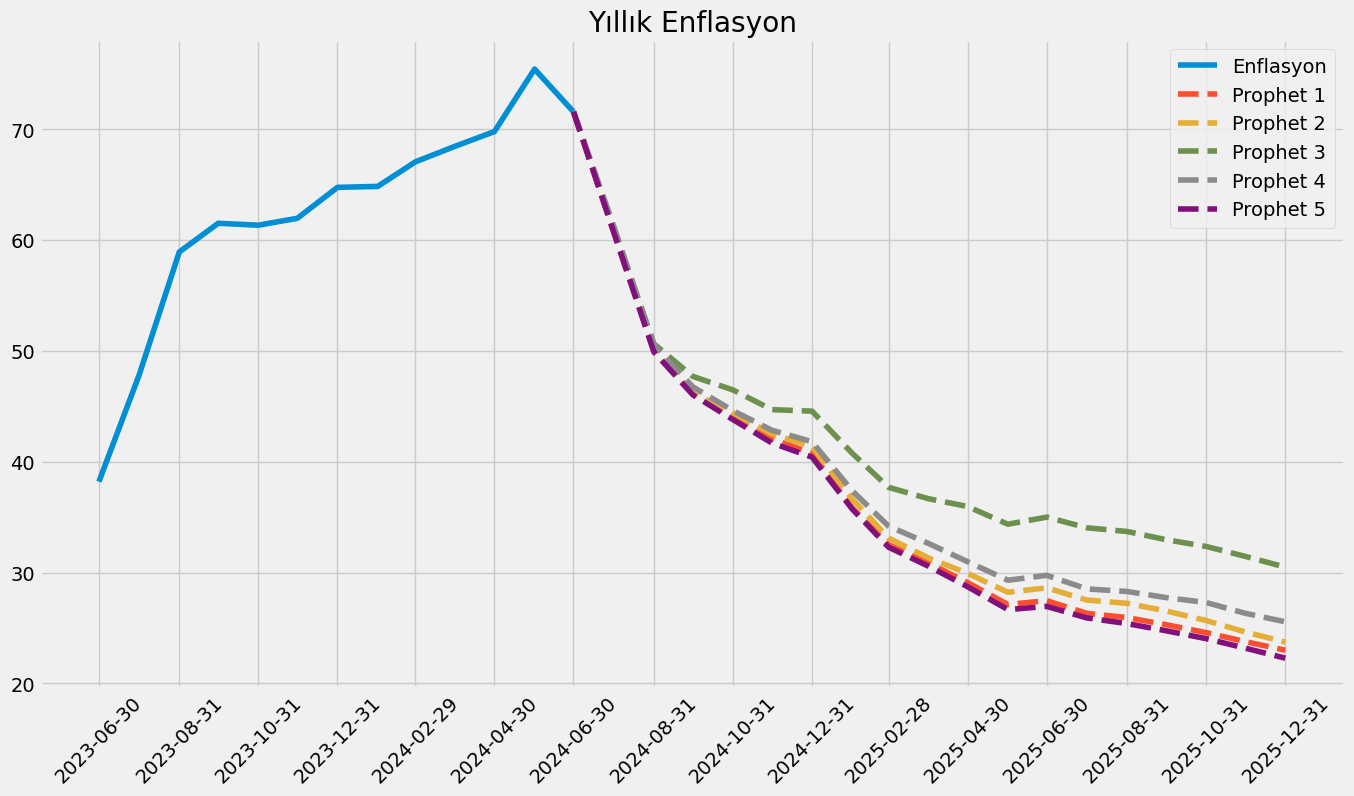

In [107]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.plot(dfas["Ortalama"].loc["2023-06-30":"2024-07-30"],label="Enflasyon")
plt.plot(dfas["p1"].loc["2024-06-30":],'--',label="Prophet 1")
plt.plot(dfas["p2"].loc["2024-06-30":],'--',label="Prophet 2")
plt.plot(dfas["p3"].loc["2024-06-30":],'--',label="Prophet 3")
plt.plot(dfas["p4"].loc["2024-06-30":],'--',label="Prophet 4")
plt.plot(dfas["p5"].loc["2024-06-30":],'--',label="Prophet 5")
plt.legend(loc=0)
plt.xticks(dfas.loc["2023-06-30":].index[::2],rotation=45)
plt.title("Yıllık Enflasyon")
plt.show()

In [108]:
dfas["Min"]=dfas.min(axis=1)

In [109]:
sonu12024=str(dfas["Ortalama"].loc["2024-12-31"])[:5]
min2024=str(dfas["Min"].loc["2024-12-31"])[:5]
max2024=str(dfas["Max"].loc["2024-12-31"])[:5]

In [110]:
params = {
    'series': "TP.PKAUO.S01.D.U",
    'startDate': "01-07-2024",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ay12sonra = formatted_response['items']
ay12sonra = pd.DataFrame(ay12sonra)


ay12sonra = ay12sonra.drop(columns=['UNIXTIME','Tarih'])
ay12sonra.columns = ['Beklenti']
ay12sonra['Beklenti'] = pd.to_numeric(ay12sonra['Beklenti'])
ay12sonra=ay12sonra.set_index(pd.date_range(start="2024-07-01",freq="M",periods=len(ay12sonra)))
ay12sonra=ay12sonra.dropna()
ay12sonra

,Beklenti
2024-07-31,42.95


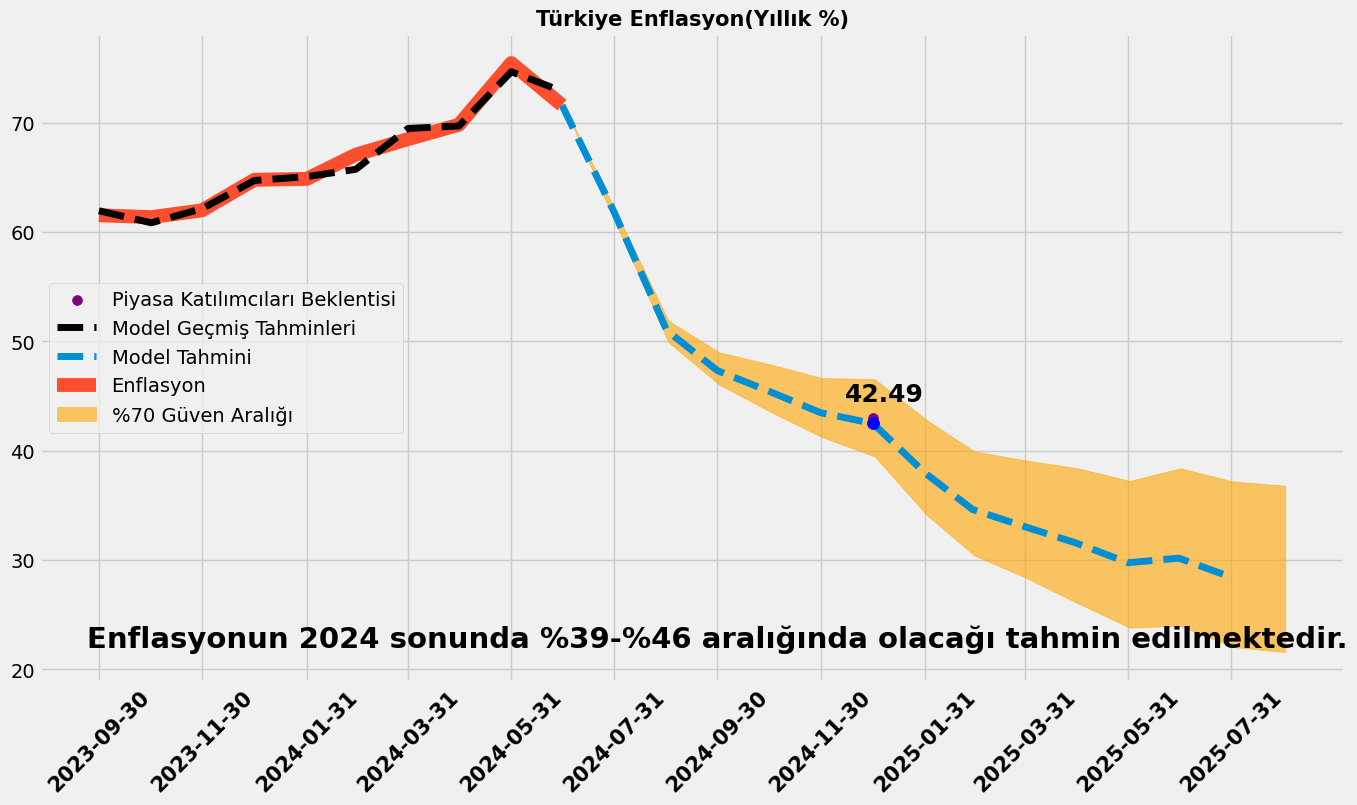

In [111]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["Beklenti"].values,color="purple",zorder=3,s=50,label="Piyasa Katılımcıları Beklentisi")
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69,74.65,72.87]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",end="2024-06-30",freq="M"))
plt.plot(geçmiş["Tahmin"],'--',label="Model Geçmiş Tahminleri",color="black",linewidth=5,zorder=3)
plt.scatter(x=dfas.loc["2024-12-31":].index[0],y=dfas["Ortalama"].loc["2024-12-31"],color='blue',zorder=4,s=75)
plt.plot(dfas["Ortalama"].loc["2024-06-30":"2025-08-30"],'--',label="Model Tahmini",linewidth=5)
plt.plot(dfas["Ortalama"].loc["2023-09-30":"2024-06-30"],label="Enflasyon",linewidth=10)
plt.fill_between(dfas.loc["2024-06-30":"2025-09-30"].index.strftime("%Y-%m"), dfas["Max"].loc["2024-06-30":"2025-09-30"].shift(1), dfas["Min"].loc["2024-06-30":"2025-09-30"].shift(1), alpha=0.6, color='orange',label="%70 Güven Aralığı")
annotation_date = mdates.datestr2num('2024-09')
plt.text(mdates.datestr2num('2025-01'), float(sonu12024)+2, sonu12024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 22, f"Enflasyonun 2024 sonunda %{min2024[:2]}-%{max2024[:2]} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='center',fontweight='bold')
plt.xticks(dfas.loc["2023-09-30":"2025-08-30"].index[::2],rotation=45,fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=6)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()

In [110]:
futures.loc["2024-07-31", ["p1min", "p2min", "p3min", "p4min", "p5min"]] = futures.loc["2024-07-31", ["p1", "p2", "p3", "p4", "p5"]].values


In [111]:
modelaylık=futures[[ 'p1min','p2min','p3min','p4min','p5min', 'ortalama']]
modelaylık.columns=["Prophet 1","Prophet 2","Prophet 3","Prophet 4","Prophet 5","Ortalama"]
modelaylık.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [112]:
yıllıktahmin1=dfas[['Ortalama','p1','p2','p3','p4','p5', 'Max',
       'Min']]


yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

In [113]:
yıllıktahmin=pd.read_csv("C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv")
yıllıktahmin=yıllıktahmin.set_index(yıllıktahmin["Unnamed: 0"])
del yıllıktahmin["Unnamed: 0"]
yıllıktahmin=yıllıktahmin.rename_axis(["Tarih"])
yıllıktahmin

,Ortalama,p1,p2,p3,p4,p5,Max,Min
Tarih,,,,,,,,
2007-01-31,9.929595,9.929595,9.929595,9.929595,9.929595,9.929595,9.929595,9.929595
2007-02-28,10.158269,10.158269,10.158269,10.158269,10.158269,10.158269,10.158269,10.158269
2007-03-31,10.863263,10.863263,10.863263,10.863263,10.863263,10.863263,10.863263,10.863263
2007-04-30,10.719962,10.719962,10.719962,10.719962,10.719962,10.719962,10.719962,10.719962
2007-05-31,9.227769,9.227769,9.227769,9.227769,9.227769,9.227769,9.227769,9.227769
...,...,...,...,...,...,...,...,...
2025-08-31,28.681778,27.005736,27.613731,34.396320,28.840514,25.707933,37.409663,22.063116
2025-09-30,28.035207,26.278479,27.019725,33.721054,28.288349,25.025051,36.730365,21.388452
2025-10-31,27.408075,25.553845,26.242813,33.179636,27.792204,24.434581,36.172921,20.750487


In [114]:
dfas.tail(18)

,Ortalama,Max,Min,p1,p2,p3,p4,p5
2024-07-31,61.762930,61.809564,60.659980,60.915317,60.960765,61.058040,61.249598,60.659980
2024-08-31,50.994477,51.869637,49.647989,50.189925,50.224896,50.644900,50.558930,49.647989
2024-09-30,47.220980,48.969013,45.616121,46.327823,46.225011,47.594835,46.730972,45.616121
2024-10-31,45.274971,47.768262,43.222048,44.202422,44.315440,46.239508,44.701900,43.359643
2024-11-30,43.421510,46.658210,40.911331,42.200495,42.669682,44.646710,42.813010,41.272405
2024-12-31,42.479215,46.601894,39.151255,40.994733,41.573679,44.500648,41.890332,39.970069
2025-01-31,38.502690,43.296840,34.383613,36.633458,37.361390,41.246960,38.054756,35.867087
2025-02-28,35.181395,40.483121,30.692585,33.329743,33.831380,38.234569,34.838173,32.416675
2025-03-31,33.635793,39.683946,28.610714,31.719510,32.059742,37.282486,33.264040,30.656711
2025-04-30,32.213937,39.033018,26.358585,30.033682,30.643425,36.694694,31.715490,28.857088


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02'),
  Text(6, 0, '2024-03'),
  Text(7, 0, '2024-04'),
  Text(8, 0, '2024-05'),
  Text(9, 0, '2024-06')])

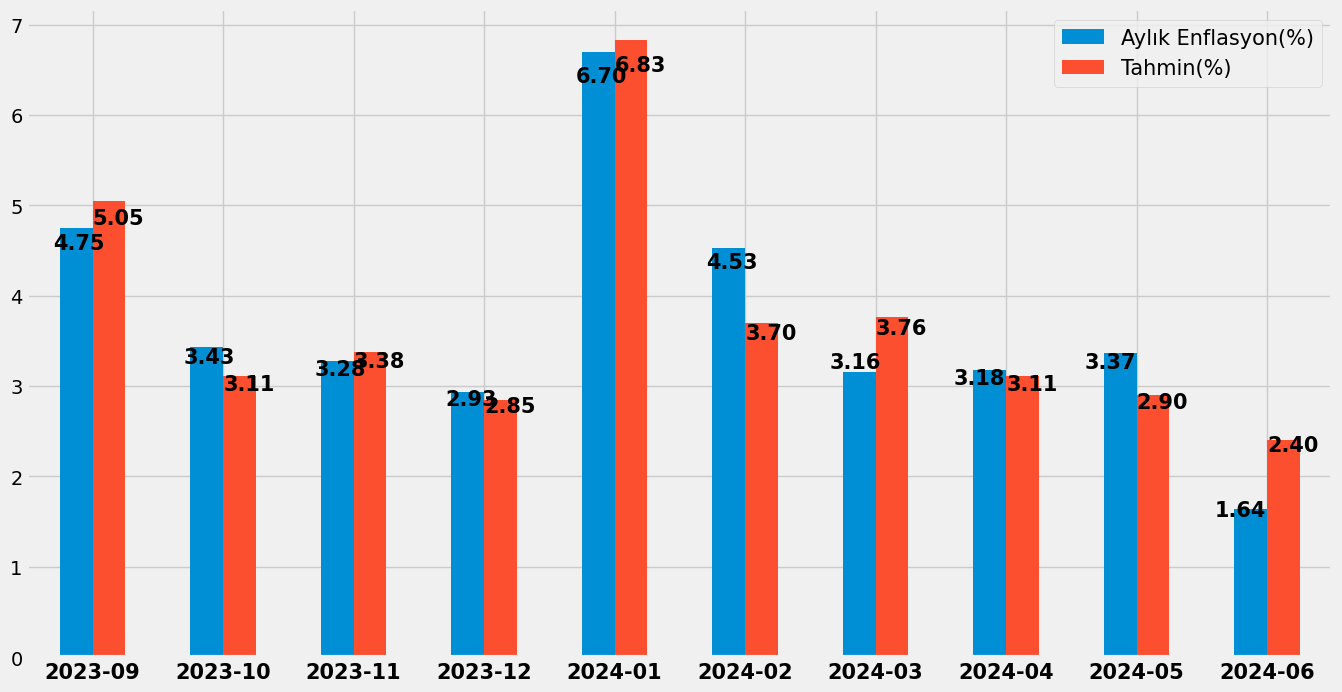

In [ ]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53,3.16,3.18,3.37,1.64],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70,3.76,3.11,2.90,2.40]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=10,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(15,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.16",xy=(5.65,gecmis.iloc[6,1]*0.85),fontweight="bold",fontsize=15)
plt.annotate("3.76",xy=(6,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.18",xy=(6.6,gecmis.iloc[7,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(7,gecmis.iloc[7,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.37",xy=(7.6,gecmis.iloc[8,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.90",xy=(8,gecmis.iloc[8,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("1.64",xy=(8.6,gecmis.iloc[9,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.40",xy=(9,gecmis.iloc[9,1]*0.95),fontweight="bold",fontsize=15)

plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

In [115]:
aylıktahmin=modelaylık["Ortalama"]
aylıktahmin=aylıktahmin.loc[:"2025-07-31"]

Text(11.75, 1.7079183265370668, '1.79')

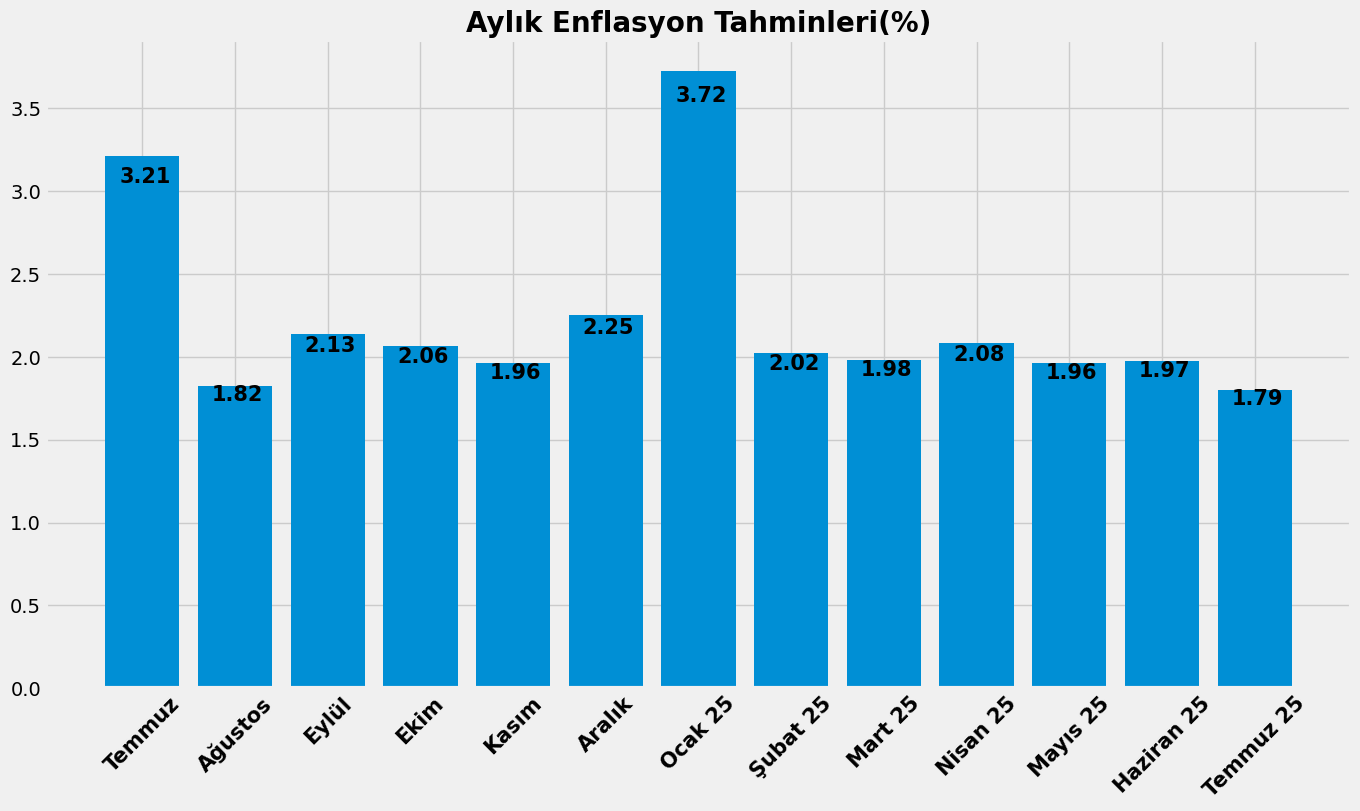

In [116]:
plt.figure(figsize=(15,8))
plt.bar(x=["Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık","Ocak 25","Şubat 25","Mart 25","Nisan 25","Mayıs 25","Haziran 25","Temmuz 25"],height=aylıktahmin.values)
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0])[:4],xy=(-0.25,aylıktahmin.iloc[0]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1])[:4],xy=(0.75,aylıktahmin.iloc[1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2])[:4],xy=(1.75,aylıktahmin.iloc[2]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3])[:4],xy=(2.75,aylıktahmin.iloc[3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4])[:4],xy=(3.75,aylıktahmin.iloc[4]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5])[:4],xy=(4.75,aylıktahmin.iloc[5]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6])[:4],xy=(5.75,aylıktahmin.iloc[6]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7])[:4],xy=(6.75,aylıktahmin.iloc[7]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8])[:4],xy=(7.75,aylıktahmin.iloc[8]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9])[:4],xy=(8.75,aylıktahmin.iloc[9]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[10])[:4],xy=(9.75,aylıktahmin.iloc[10]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[11])[:4],xy=(10.75,aylıktahmin.iloc[11]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[12])[:4],xy=(11.75,aylıktahmin.iloc[12]*0.95),fontweight="bold",fontsize=15)



